# Example with Halo and manifold in CR3BP

Yuri Shimane, 2021.05.27

In [1]:
using LinearAlgebra
using DifferentialEquations
using Plots

In [2]:
gr()

Plots.GRBackend()

In [15]:
include("../R3BP/src/R3BP.jl")

Main.R3BP

### Defining Lagrange Points

In [4]:
params = R3BP.get_cr3bp_param(399, 301)
mu = params.mu
println("mu: $mu")
lp = R3BP.lagrangePoints(mu)

mu: 0.012150584269940354


5×6 Array{Float64,2}:
  0.836915   0.0       0.0  0.0  0.0  0.0
  1.15568    0.0       0.0  0.0  0.0  0.0
 -1.00506    0.0       0.0  0.0  0.0  0.0
  0.487849   0.866025  0.0  0.0  0.0  0.0
  0.487849  -0.866025  0.0  0.0  0.0  0.0

In [5]:
# check Jacobi constant at l2
R3BP.jacobiConstant(mu, lp[2,:])

3.172160450394823

In [6]:
# known state-vector and period of a halo orbit
X0 = [1.176924090973164, 0.0, -0.060210863312217, 0.0, -0.173836346247689, 0.0];
T = 3.385326412831325;

In [8]:
tspan = (0.0, T)
p = (mu)
prob = ODEProblem(R3BP.rhs_cr3bp_sv!, X0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-12, abstol=1e-12);

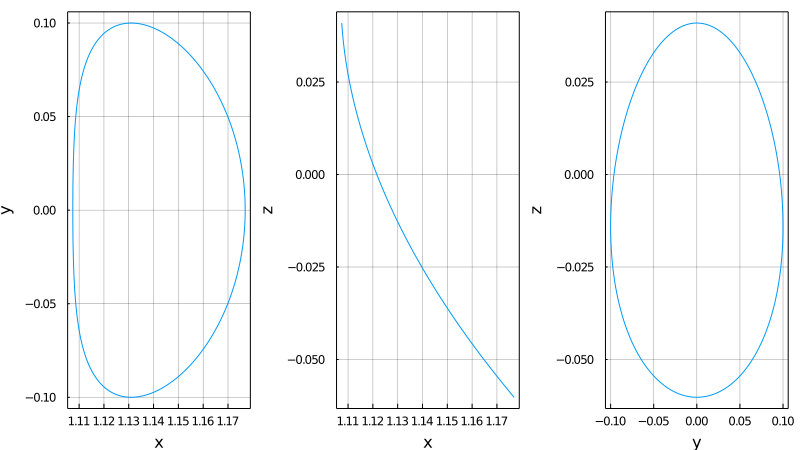

In [36]:
solarr = R3BP.sol_to_arrays(sol)   # get state-history from sol for plotting
p1 = plot(solarr[1,:], solarr[2,:], xlabel="x", ylabel="y", label=false, gridalpha=0.4)
p2 = plot(solarr[1,:], solarr[3,:], xlabel="x", ylabel="z", label=false, gridalpha=0.4)
p3 = plot(solarr[2,:], solarr[3,:], xlabel="y", ylabel="z", label=false, gridalpha=0.4)
plot(p1,p2,p3, layout = (1,3), size=(800, 450), frame_style=:box)

### Construction of manifold

In [10]:
function condition(u,t,integrator)
  u[1] - 1.25   # when y-value hits xx
end

affect!(integrator) = terminate!(integrator)

# assign callback
cb = ContinuousCallback(condition,affect!)

ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT),Float64,Int64,Nothing,Int64}(condition, affect!, affect!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, nothing, DiffEqBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0)

In [21]:
# parameters for manifolds
stability = true;
tf = -10.0

# generate manifolds
outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="positive");

Linear stability ν = 460.9384 
Eigenvalue unstable: 921.8757, stable: 0.0011, product: 1.0000


The `get_manifold` function returns an `EnsembleSolution`, which consists of a collection of individual `ODESolution` of each manifold branch. 

In [37]:
plot(outsim, linealpha=0.4, vars=(1,2), flip=false, aspect_ratio=:equal, size=(800,650), c=:orangered, 
     frame_style=:box, gridalpha=0.4)